In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import geopandas
import descartes

In [3]:
## Read Data 
confirmed = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [166]:
virginia_confirmed = confirmed[confirmed.Province_State == 'Virginia'].groupby('Province_State').sum()
virginia_deaths = deaths[deaths.Province_State == 'Virginia'].groupby('Province_State').sum()

C:\Users\sw708\Miniconda3\envs\sams_env\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sw708\Miniconda3\envs\sams_env\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


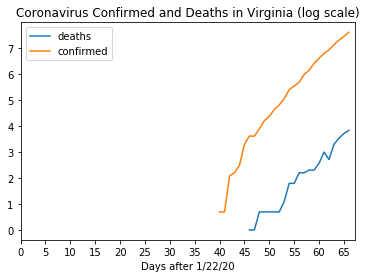

In [201]:
vaconfirm = virginia_confirmed.iloc[:,12:]
vatime = virginia_deaths.iloc[:,12:]
x = vatime.columns
y = vatime.iloc[0]
x1 = vaconfirm.columns
y2 = vaconfirm.iloc[0]
fig, ax = plt.subplots()
out1 = ax.plot(x,np.log(y), label = 'deaths')
out2 = ax.plot(x1,np.log(y2), label = 'confirmed')
out3 = ax.set_title("Coronavirus Confirmed and Deaths in Virginia (log scale)")
out4 = ax.set_xticks(np.arange(0,len(x),5))
out5 =ax.set_xticklabels(np.arange(0,len(x),5))
out5 = ax.set_xlabel("Days after 1/22/20")
ax.legend()

## GeoPandas Plots

In [1]:
virginia_geo = deaths[deaths.Province_State == 'Virginia']
gdf = geopandas.GeoDataFrame(
    virginia_geo, geometry=geopandas.points_from_xy(virginia_geo.Long_, virginia_geo.Lat))
gdf = gdf[gdf.Lat != 0]
virginia_geo_confirm = confirmed[confirmed.Province_State == 'Virginia']
gdf2 = geopandas.GeoDataFrame(
    virginia_geo_confirm, geometry=geopandas.points_from_xy(virginia_geo_confirm.Long_, virginia_geo_confirm.Lat))
gdf2 = gdf2[gdf2.Lat != 0]
confirm_per_city = gdf2.iloc[:,12:].sum(axis = 1)
states = geopandas.read_file('map_data.json')
virginia_geo = states[states.NAME == 'Virginia']
deaths_per_city = gdf.iloc[:,12:].sum(axis = 1)

NameError: name 'deaths' is not defined

In [2]:
fig, ax = plt.subplots(figsize=(10,10))
virginia_geo.plot(ax = ax, color = 'blue')
gdf.plot(ax=ax, color = 'red', marker = '.', markersize = deaths_per_city, zorder =2, label = 'Deaths')
gdf2.plot(ax=ax, color = 'yellow', marker = '.', markersize = confirm_per_city, label = 'Confirmed')
ax.set_title("Confirmed and Deaths in Virginia (Marker Proportional to Magnitude)")
ax.legend()

NameError: name 'plt' is not defined